## 航班准点分析案例
### 数据集
数据集为美国各州机场的航班信息，包含出发地，目的地，是否出发延迟15分钟，是否到达延迟15分钟等。

https://www.transtats.bts.gov/Fields.asp?Table_ID=236

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#支持中文显示
mpl.rcParams['font.family']='Kaiti'
# 使用非unicode的负号，当使用中文时候要设置
mpl.rcParams['axes.unicode_minus']=False
%matplotlib inline

### 数据探索和清洗

In [8]:
data = pd.read_csv('data/airport-ontime.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 17 columns):
FL_DATE                  502617 non-null object
UNIQUE_CARRIER           502617 non-null object
ORIGIN_AIRPORT_ID        502617 non-null int64
ORIGIN_AIRPORT_SEQ_ID    502617 non-null int64
ORIGIN_CITY_MARKET_ID    502617 non-null int64
ORIGIN_STATE_ABR         502617 non-null object
DEST_AIRPORT_ID          502617 non-null int64
DEST_AIRPORT_SEQ_ID      502617 non-null int64
DEST_CITY_MARKET_ID      502617 non-null int64
DEST_STATE_ABR           502617 non-null object
DEP_DELAY_NEW            492974 non-null float64
DEP_DEL15                492974 non-null float64
ARR_DELAY_NEW            490716 non-null float64
ARR_DEL15                490716 non-null float64
DISTANCE                 502617 non-null float64
DISTANCE_GROUP           502617 non-null int64
Unnamed: 16              0 non-null float64
dtypes: float64(6), int64(7), object(4)
memory usage: 65.2+ MB


In [13]:
# 处理缺失值
# data.head()
# DEP_DEL15  9643 空值
# data['DEP_DEL15'].isnull().sum()
# ARR_DEL15 11901 空值
# data['ARR_DEL15'].isnull().sum()

# 删除Uname列
data.dropna(axis=1,how='all',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 16 columns):
FL_DATE                  502617 non-null object
UNIQUE_CARRIER           502617 non-null object
ORIGIN_AIRPORT_ID        502617 non-null int64
ORIGIN_AIRPORT_SEQ_ID    502617 non-null int64
ORIGIN_CITY_MARKET_ID    502617 non-null int64
ORIGIN_STATE_ABR         502617 non-null object
DEST_AIRPORT_ID          502617 non-null int64
DEST_AIRPORT_SEQ_ID      502617 non-null int64
DEST_CITY_MARKET_ID      502617 non-null int64
DEST_STATE_ABR           502617 non-null object
DEP_DELAY_NEW            492974 non-null float64
DEP_DEL15                492974 non-null float64
ARR_DELAY_NEW            490716 non-null float64
ARR_DEL15                490716 non-null float64
DISTANCE                 502617 non-null float64
DISTANCE_GROUP           502617 non-null int64
dtypes: float64(5), int64(7), object(4)
memory usage: 61.4+ MB


In [20]:
# 重复值处理 duplicated方法处理
# data.duplicated().any()
# data[data.duplicated(keep=False)].loc[[0,2]]

# 删除重复数据
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394113 entries, 0 to 502616
Data columns (total 16 columns):
FL_DATE                  394113 non-null object
UNIQUE_CARRIER           394113 non-null object
ORIGIN_AIRPORT_ID        394113 non-null int64
ORIGIN_AIRPORT_SEQ_ID    394113 non-null int64
ORIGIN_CITY_MARKET_ID    394113 non-null int64
ORIGIN_STATE_ABR         394113 non-null object
DEST_AIRPORT_ID          394113 non-null int64
DEST_AIRPORT_SEQ_ID      394113 non-null int64
DEST_CITY_MARKET_ID      394113 non-null int64
DEST_STATE_ABR           394113 non-null object
DEP_DELAY_NEW            386058 non-null float64
DEP_DEL15                386058 non-null float64
ARR_DELAY_NEW            383812 non-null float64
ARR_DEL15                383812 non-null float64
DISTANCE                 394113 non-null float64
DISTANCE_GROUP           394113 non-null int64
dtypes: float64(5), int64(7), object(4)
memory usage: 51.1+ MB


### 起飞以及到达延迟情况

0.0    260977
1.0    125081
Name: DEP_DEL15, dtype: int64

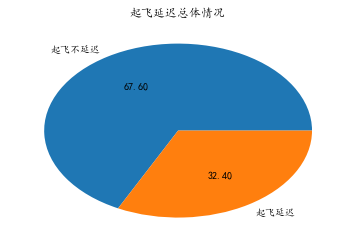

In [34]:
# 分析起飞、到达延迟总体状况
# 起飞延迟总体状况
# 0 表示没有延迟 1表示存在延迟
# data['DEP_DEL15'].head()
s = data['DEP_DEL15'].dropna()
delays = s.value_counts()
display(delays)
delays.name=''
delays.plot(kind='pie',labels=['起飞不延迟','起飞延迟'],autopct='%.2f',title='起飞延迟总体情况')

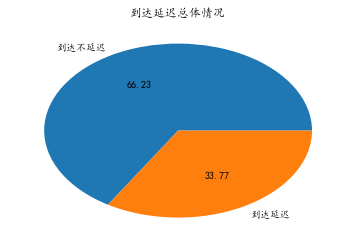

In [36]:
# 到达延迟总体状况
s = data['ARR_DEL15'].dropna()
delays = s.value_counts()
# display(delays)
delays.name=''
delays.plot(kind='pie',labels=['到达不延迟','到达延迟'],autopct='%.2f',title='到达延迟总体情况')

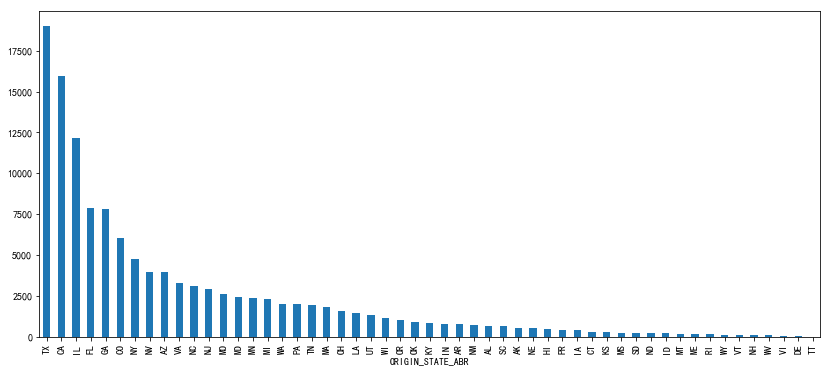

In [51]:
# 针对机场航班延迟数量来分析，找出哪个机场延迟航班数最多
# 机场起飞延迟  ORIGIN_STATE_ABR DEP_DEL15
# 缺失值处理
d = data[['ORIGIN_STATE_ABR','DEP_DEL15']].dropna()
depart_delay_couots = d.groupby('ORIGIN_STATE_ABR')['DEP_DEL15'].sum()
# 设置图形大小 figsize=(a,b) a表示图形宽，b表示图形高，单位英寸
depart_delay_couots.sort_values(ascending=False).plot(kind='bar',figsize=(14,6))

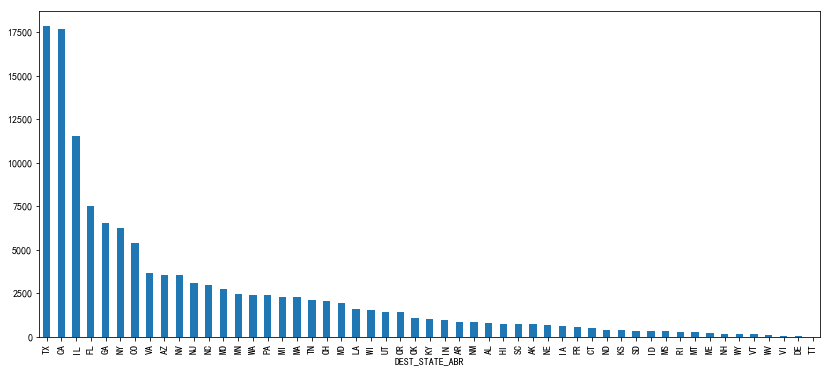

In [53]:
# 机场到达延迟  DEST_STATE_ABR   ARR_DEL15
# 缺失值处理
d = data[['DEST_STATE_ABR','ARR_DEL15']].dropna()
arrive_delay_couots = d.groupby('DEST_STATE_ABR')['ARR_DEL15'].sum()
# # 设置图形大小 figsize=(a,b) a表示图形宽，b表示图形高，单位英寸
arrive_delay_couots.sort_values(ascending=False).plot(kind='bar',figsize=(14,6))

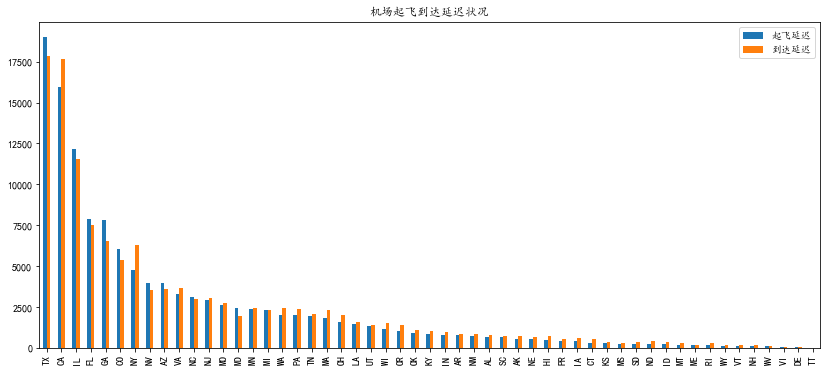

In [59]:
# 合并机场起飞和延迟状况
# display(depart_delay_couots,arrive_delay_couots)
delay_df=pd.DataFrame([depart_delay_couots,arrive_delay_couots]).T
delay_df.columns=['起飞延迟','到达延迟']
delay_df.sort_values('起飞延迟',ascending=False).plot(kind='bar',figsize=(14,6),title='机场起飞到达延迟状况')

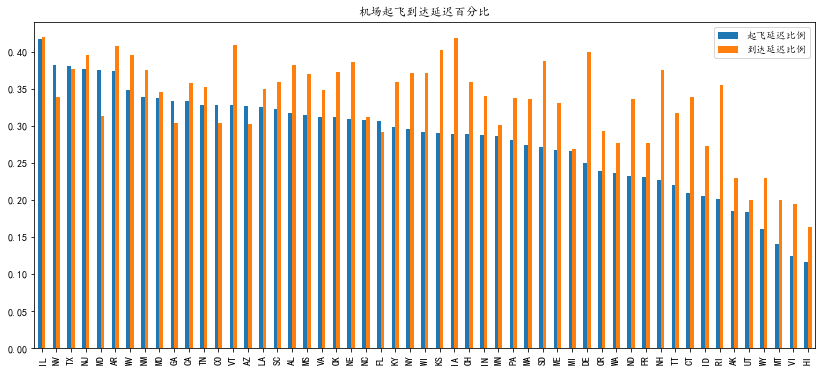

In [74]:
# 按照机场航班延迟的百分比分析，  机场延迟的航班数/机场航班
# 起飞   机场起飞延迟的航班数  depart_delay_couots
# d = data[['ORIGIN_STATE_ABR','DEP_DEL15']].dropna()
# departs = d['ORIGIN_STATE_ABR'].value_counts()
# # depart_delay_couots 矢量化除以 departs
# pct_departure_delays = depart_delay_couots/departs
# pct_departure_delays

# 到达延迟百分比
# d = data[['DEST_STATE_ABR','ARR_DEL15']].dropna()
# # 计算到达航班的数量
# arrives = d['DEST_STATE_ABR'].value_counts()
# # arrive_delay_couots 机场到达延迟航班数
# pct_arrive_delays = arrive_delay_couots/arrives
# pct_arrive_delays

# 将起飞延迟和到达延迟组合成DataFrame，柱状图描述
pct_delay_df=pd.DataFrame([pct_departure_delays,pct_arrive_delays]).T
pct_delay_df.columns=['起飞延迟比例','到达延迟比例']
# display(pct_departure_delays,pct_arrive_delays)
pct_delay_df.sort_values('起飞延迟比例',ascending=False).plot(kind='bar',title='机场起飞到达延迟百分比',figsize=(14,6))